In [50]:
%pip install spacy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [58]:
%%python3 -m spacy download ru_core_news_lg

Defaulting to user installation because normal site-packages is not writeable
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [55]:
import spacy
import nltk
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import codecs
from sklearn.feature_extraction.text import CountVectorizer

# Дедупликация датасета

In [658]:
df = pd.read_csv("/home/jupyter/mnt/s3/generalvibe/data/train.csv")
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df["length"] = df["sentence"].str.len()
df

,sentence,1category,2category,sentiment,length
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44
1,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−,49
2,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−,44
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56
...,...,...,...,...,...
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150
19358,"Я считаю, это прорыв и лидерство финансовых ус...",?,NaN,+,109
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130


In [659]:
df_1 = df.groupby("sentence").count()
df_1["count"] = df_1["length"]
df_1.drop(["1category", "sentiment", "length", "2category"], axis=1, inplace=True)
df_1

,count
sentence,
"10.12.2020 20:57 Хотелось бы выразить огромную благодарность банку Тинькофф за отличные дебетовые карты,а именно Тинькофф Блэк и Тинькофф Джуниор.",3
"!, на что сотрудник банка ответила мне что данную отметку мне ставить почему-то нельзя.",3
"!, тем самым оставив меня без средств к существованию, тем более я многодетный отец, единственный кормилец семьи!!!",3
"!16 ноября сего года я обращаюсь к администратору энергомаша, нет сил и нервов уже!",3
"!22.02.2020 заблокировали счет якобы из-за просроченой задолжености по кредиту,сразу позвонил в банк,сотрудники футболят друг на друга и никто не говорит в чем дело и постоянно переносят время рассмотрения.",3
...,...
я своевременно и в полном объеме исполнял ВСЕ условия договора.,2
я у сотрудника спросила- получила ответ. но сотрудник меня обманул наглым образом.,3
"– восхищаюсь я. Проходит еще неделя... Ну, я думаю, интересно, а то ближайшее время уже наступило или нет... Звоню на Горячую линию 8 800 555 5550, все ж под рукой – Интернет, телефон… По телефону сразу предупреждают – запись разговора обязательна – собираюсь с мыслями, чтобы меня поняли.– Слушаю вас, – протяжное московское аканье.",3


In [660]:
df = df.join(df_1, on="sentence", how="left")
df

,sentence,1category,2category,sentiment,length,count
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44,3
1,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−,49,2
2,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−,44,3
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36,6
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56,2
...,...,...,...,...,...,...
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109,3
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150,3
19358,"Я считаю, это прорыв и лидерство финансовых ус...",?,NaN,+,109,3
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130,3


In [662]:
df_3 = df.groupby(["sentence", "sentiment"]).count()
df_3["count_sentiment"] = df_3["length"]
df_3.drop(["length", "count", "1category", "2category"], axis=1, inplace=True)
df_3

count_sentiment
sentence                                           sentiment                 
 10.12.2020 20:57 Хотелось бы выразить огромную... +                        3
!, на что сотрудник банка ответила мне что данн... ?                        1
                                                   −                        2
!, тем самым оставив меня без средств к существ... −                        3
!16 ноября сего года я обращаюсь к администрато... ?                        2
...                                                                       ...
я своевременно и в полном объеме исполнял ВСЕ у... ?                        2
я у сотрудника спросила- получила ответ. но сот... −                        3
– восхищаюсь я. Проходит еще неделя... Ну, я ду... ?                        3
…Вы своих клиентов совсем не уважаете, считая и... −                        3
№ ДО 53/Ф20-04-07/1333 от 19.09.2018 и также в ... ?                        3

[8377 rows x 1 columns]

In [663]:
df = df.join(df_3, on=["sentence", "sentiment"], how="left")
df

,sentence,1category,2category,sentiment,length,count,count_sentiment
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44,3,2
1,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−,49,2,2
2,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−,44,3,3
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36,6,6
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56,2,2
...,...,...,...,...,...,...,...
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109,3,3
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150,3,2
19358,"Я считаю, это прорыв и лидерство финансовых ус...",?,NaN,+,109,3,2
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130,3,3


In [664]:
df["conf_sentiment"] = df["count_sentiment"] / df["count"]
df

,sentence,1category,2category,sentiment,length,count,count_sentiment,conf_sentiment
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44,3,2,0.666667
1,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−,49,2,2,1.000000
2,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−,44,3,3,1.000000
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36,6,6,1.000000
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56,2,2,1.000000
...,...,...,...,...,...,...,...,...
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109,3,3,1.000000
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150,3,2,0.666667
19358,"Я считаю, это прорыв и лидерство финансовых ус...",?,NaN,+,109,3,2,0.666667
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130,3,3,1.000000


In [665]:
df = df[df.groupby(["sentence"])["conf_sentiment"].transform(lambda x: x >= x.median())]
df.shape

(18426, 8)

In [666]:
df = df[df["1category"] != "?"]
df

,sentence,1category,2category,sentiment,length,count,count_sentiment,conf_sentiment
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44,3,2,0.666667
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36,6,6,1.000000
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56,2,2,1.000000
5,"Все время согласовывалось, всё делалось быстро.",Communication,NaN,+,47,3,3,1.000000
6,Абсолютное бездействие и нежелание банка работ...,Quality,NaN,−,62,2,2,1.000000
...,...,...,...,...,...,...,...,...
19355,Руководитель Ф-рин А. крайне неквалифицирован ...,Communication,NaN,−,103,3,3,1.000000
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109,3,3,1.000000
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150,3,2,0.666667
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130,3,3,1.000000


In [669]:
df_2 = df.groupby(["sentence", "1category"]).count()
df_2["count_category"] = df_2["length"]
df_2.drop(["sentiment", "length", "count", "count_sentiment", "conf_sentiment", "2category"], axis=1, inplace=True)
df_2

,,count_category
sentence,1category,
"10.12.2020 20:57 Хотелось бы выразить огромную благодарность банку Тинькофф за отличные дебетовые карты,а именно Тинькофф Блэк и Тинькофф Джуниор.",Quality,3
"!, на что сотрудник банка ответила мне что данную отметку мне ставить почему-то нельзя.",Communication,1
"!, тем самым оставив меня без средств к существованию, тем более я многодетный отец, единственный кормилец семьи!!!",Quality,1
"!22.02.2020 заблокировали счет якобы из-за просроченой задолжености по кредиту,сразу позвонил в банк,сотрудники футболят друг на друга и никто не говорит в чем дело и постоянно переносят время рассмотрения.",Communication,3
"!в итоге даже не извинились,долго искали карту,отказывались распечатывать реквизиты карты.. По факту в этом отделении была дважды,и все время одна история!!",Communication,1
...,...,...
"я просто не в состоянии заплатить такую сумму, а проценты капают каждый день!",Quality,1
я у сотрудника спросила- получила ответ. но сотрудник меня обманул наглым образом.,Communication,3
"– восхищаюсь я. Проходит еще неделя... Ну, я думаю, интересно, а то ближайшее время уже наступило или нет... Звоню на Горячую линию 8 800 555 5550, все ж под рукой – Интернет, телефон… По телефону сразу предупреждают – запись разговора обязательна – собираюсь с мыслями, чтобы меня поняли.– Слушаю вас, – протяжное московское аканье.",Communication,2


In [670]:
df = df.join(df_2, on=["sentence", "1category"], how="left")
df

,sentence,1category,2category,sentiment,length,count,count_sentiment,conf_sentiment,count_category
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44,3,2,0.666667,1
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36,6,6,1.000000,3
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56,2,2,1.000000,2
5,"Все время согласовывалось, всё делалось быстро.",Communication,NaN,+,47,3,3,1.000000,2
6,Абсолютное бездействие и нежелание банка работ...,Quality,NaN,−,62,2,2,1.000000,1
...,...,...,...,...,...,...,...,...,...
19355,Руководитель Ф-рин А. крайне неквалифицирован ...,Communication,NaN,−,103,3,3,1.000000,2
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109,3,3,1.000000,1
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150,3,2,0.666667,2
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130,3,3,1.000000,3


In [671]:
df["conf_category"] = df["count_category"] / df["count"]
df

,sentence,1category,2category,sentiment,length,count,count_sentiment,conf_sentiment,count_category,conf_category
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44,3,2,0.666667,1,0.333333
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36,6,6,1.000000,3,0.500000
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56,2,2,1.000000,2,1.000000
5,"Все время согласовывалось, всё делалось быстро.",Communication,NaN,+,47,3,3,1.000000,2,0.666667
6,Абсолютное бездействие и нежелание банка работ...,Quality,NaN,−,62,2,2,1.000000,1,0.500000
...,...,...,...,...,...,...,...,...,...,...
19355,Руководитель Ф-рин А. крайне неквалифицирован ...,Communication,NaN,−,103,3,3,1.000000,2,0.666667
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109,3,3,1.000000,1,0.333333
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150,3,2,0.666667,2,0.666667
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130,3,3,1.000000,3,1.000000


In [672]:
df.drop(["count", "count_category", "count_sentiment"], axis=1, inplace=True)

In [673]:
df = df[df.groupby(["sentence"])["conf_category"].transform(lambda x: x >= x.median())]
df.shape

(11890, 7)

In [674]:
df.drop(["conf_sentiment", "conf_category"], axis=1, inplace=True)
df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sentence,1category,2category,sentiment,length
0,При этом всегда получал качественные услуги.,Communication,NaN,+,44
3,Отвратительное отношение к клиентам.,Communication,NaN,−,36
4,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+,56
5,"Все время согласовывалось, всё делалось быстро.",Communication,NaN,+,47
6,Абсолютное бездействие и нежелание банка работ...,Quality,NaN,−,62
...,...,...,...,...,...
19355,Руководитель Ф-рин А. крайне неквалифицирован ...,Communication,NaN,−,103
19356,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−,109
19357,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−,150
19359,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+,130


In [675]:
# df.drop_duplicates(subset=['sentence', "1category", "sentiment"]).to_csv("/home/jupyter/mnt/s3/generalvibe/data/clean_train.csv", index=False)
df.drop_duplicates(subset=['sentence', "1category", "sentiment"], inplace=True)

<ipython-input-366-d151c5b5f94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['sentence', "1category", "sentiment"], inplace=True)


In [602]:
df.groupby("sentiment").agg({"sentence": "count"})

,sentence
sentiment,
+,2551
?,383
−,4026


- Neutral[double] – вероятность отнесения этого отзыва к нейтральному сентименту
- Positive[double] – вероятность отнесения этого отзыва к положительному сентименту
- Negative[double] – вероятность отнесения этого отзыва к отрицательному сентименту

In [677]:
list(df[df["sentiment"] == "+"]["sentence"].head(2))

['При этом всегда получал качественные услуги.',
 'Всегда в любое время дня и ночи помогут, ответят, решат.']

In [678]:
list(df[df["sentiment"] == "−"]["sentence"].head(2))

['Отвратительное отношение к клиентам.',
 'Абсолютное бездействие и нежелание банка работать с клиентами.']

In [679]:
list(df[df["sentiment"] == "?"]["sentence"].head(2))

['В отделение на Павелецкой девушка сообщила, что карту\xa0РЖД Бонус Классическая НЕЛЬЗЯ открыть как основную, можно открыть только как дополнительную и она будет в любом случае платная, независимо от того, совершу я оборот более 15 000 рублей или нет.',
 'Добрый день.04.08.2015 в 19:41:55 я зарегистрировался в очереди под №069 в доп.офисе на ст.м.']

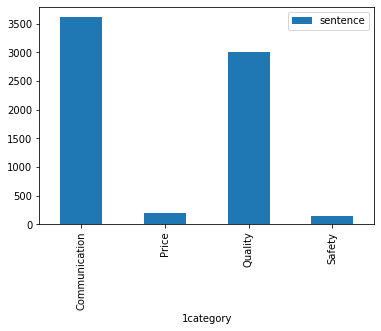

In [680]:
df.groupby("1category").agg({"sentence": "count"}).plot.bar()

# Очистка данных

In [681]:
df["sentence"] = df["sentence"].str.lower()

<ipython-input-372-c49c1be2fb79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence"] = df["sentence"].str.lower()


In [682]:
df["sentence"] = df["sentence"].str.replace(r'[?!=,.\'\"\`]+', '')

<ipython-input-373-26a7fa3c03fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence"] = df["sentence"].str.replace(r'[?!=,.\'\"\`]+', '')


# Токенизация

In [683]:
tokenizer = RegexpTokenizer(r'\w+')

sentences = pd.DataFrame(df["sentence"]).reset_index().drop("index", axis=1)
sentences['tokens'] = sentences['sentence'].apply(tokenizer.tokenize)
sentences

,sentence,tokens
0,при этом всегда получал качественные услуги,"[при, этом, всегда, получал, качественные, усл..."
1,отвратительное отношение к клиентам,"[отвратительное, отношение, к, клиентам]"
2,всегда в любое время дня и ночи помогут ответя...,"[всегда, в, любое, время, дня, и, ночи, помогу..."
3,все время согласовывалось всё делалось быстро,"[все, время, согласовывалось, всё, делалось, б..."
4,абсолютное бездействие и нежелание банка работ...,"[абсолютное, бездействие, и, нежелание, банка,..."
...,...,...
6955,ни заявления ни документа подтверждающего опла...,"[ни, заявления, ни, документа, подтверждающего..."
6956,и в последний момент (так как карта до августа...,"[и, в, последний, момент, так, как, карта, до,..."
6957,хотелось бы так же прояснить что до сложившейс...,"[хотелось, бы, так, же, прояснить, что, до, сл..."
6958,никогда и ни в коем случае не открывайте счет ...,"[никогда, и, ни, в, коем, случае, не, открывай..."


# Лемматизация

In [684]:
import ru_core_news_lg
nlp = ru_core_news_lg.load()
doc = nlp(sentences["tokens"][0][1])
for token in doc:
    print(token.text + ' - ' + token.lemma_)

этом - это


In [685]:
sentences["lemma"] = sentences["tokens"].apply(lambda x: [token.lemma_ for token in nlp(" ".join(x))])

In [686]:
all_words = [word for tokens in sentences["lemma"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in sentences["lemma"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

128737 words total, with a vocabulary size of 9351
Max sentence length is 179


In [687]:
sentences['lemma_string'] = sentences['lemma'].apply(" ".join)
sentences

,sentence,tokens,lemma,lemma_string
0,при этом всегда получал качественные услуги,"[при, этом, всегда, получал, качественные, усл...","[при, это, всегда, получать, качественный, усл...",при это всегда получать качественный услуга
1,отвратительное отношение к клиентам,"[отвратительное, отношение, к, клиентам]","[отвратительный, отношение, к, клиент]",отвратительный отношение к клиент
2,всегда в любое время дня и ночи помогут ответя...,"[всегда, в, любое, время, дня, и, ночи, помогу...","[всегда, в, любой, время, день, и, ночь, помоч...",всегда в любой время день и ночь помочь ответи...
3,все время согласовывалось всё делалось быстро,"[все, время, согласовывалось, всё, делалось, б...","[весь, время, согласовываться, всё, делаться, ...",весь время согласовываться всё делаться быстро
4,абсолютное бездействие и нежелание банка работ...,"[абсолютное, бездействие, и, нежелание, банка,...","[абсолютный, бездействие, и, нежелание, банк, ...",абсолютный бездействие и нежелание банк работа...
...,...,...,...,...
6955,ни заявления ни документа подтверждающего опла...,"[ни, заявления, ни, документа, подтверждающего...","[ни, заявление, ни, документ, подтверждать, оп...",ни заявление ни документ подтверждать оплата с...
6956,и в последний момент (так как карта до августа...,"[и, в, последний, момент, так, как, карта, до,...","[и, в, последний, момент, так, как, карта, до,...",и в последний момент так как карта до август 2...
6957,хотелось бы так же прояснить что до сложившейс...,"[хотелось, бы, так, же, прояснить, что, до, сл...","[хотеться, бы, так, же, прояснить, что, до, сл...",хотеться бы так же прояснить что до сложиться ...
6958,никогда и ни в коем случае не открывайте счет ...,"[никогда, и, ни, в, коем, случае, не, открывай...","[никогда, и, ни, в, кой, случай, не, открывать...",никогда и ни в кой случай не открывать счёт в ...


# Мешок слов

In [688]:
stop_words = pd.read_csv("stop_words.txt", header = None)
stop_words = list(stop_words[0])

In [689]:
vectorizer=CountVectorizer(min_df = 0.001, stop_words=stop_words)

f = vectorizer.fit_transform(sentences['lemma_string'])
# sentences['vector'] = sentences['lemma_string']
# for i in range(len(sentences['lemma_string'])):
#     sentences['vector'][i] = f[i]
print(f.shape)
print(f[0].shape)
print(f[1].toarray())

(6960, 1905)
(1, 1905)
[[0 0 0 ... 0 0 0]]


In [831]:
X = pd.DataFrame(f.toarray())
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [832]:
X["length"] = df["length"]

# Train Test Split and learning, category prediction

In [833]:
inference = pd.read_csv("inference.csv")
inference

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,length
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,76
945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88
946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74
947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48


In [834]:
import time
from sklearn.model_selection import train_test_split
target = df['1category'].replace(to_replace=['Communication', 'Price', 'Quality', 'Safety'], value=[0, 1, 2, 3])
target = target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.8, random_state=123)

In [835]:
catboost_clf = CatBoostClassifier(iterations=3000, task_type="CPU", max_depth=3, eval_metric='AUC', l2_leaf_reg=0.12)
catboost_clf.fit(X_train, y_train)
y_predict_test = catboost_clf.predict_proba(X_test)
y_predict_train = catboost_clf.predict_proba(X_train)
category_preds = catboost_clf.predict(X)
category_preds_probs = catboost_clf.predict_proba(X)

print(roc_auc_score(y_train, y_predict_train, multi_class="ovr", average="weighted"))
print(roc_auc_score(y_test, y_predict_test, multi_class="ovr", average="weighted"))

0:	total: 6.55ms	remaining: 19.6s
1:	total: 13ms	remaining: 19.5s
2:	total: 19.3ms	remaining: 19.3s
3:	total: 25.3ms	remaining: 18.9s
4:	total: 32.6ms	remaining: 19.5s
5:	total: 39.9ms	remaining: 19.9s
6:	total: 46.2ms	remaining: 19.8s
7:	total: 52.3ms	remaining: 19.6s
8:	total: 58.5ms	remaining: 19.4s
9:	total: 64.9ms	remaining: 19.4s
10:	total: 71.1ms	remaining: 19.3s
11:	total: 77.3ms	remaining: 19.3s
12:	total: 83.9ms	remaining: 19.3s
13:	total: 90.4ms	remaining: 19.3s
14:	total: 96.9ms	remaining: 19.3s
15:	total: 103ms	remaining: 19.2s
16:	total: 109ms	remaining: 19.2s
17:	total: 116ms	remaining: 19.2s
18:	total: 122ms	remaining: 19.2s
19:	total: 129ms	remaining: 19.2s
20:	total: 135ms	remaining: 19.1s
21:	total: 141ms	remaining: 19.1s
22:	total: 148ms	remaining: 19.1s
23:	total: 154ms	remaining: 19s
24:	total: 160ms	remaining: 19s
25:	total: 166ms	remaining: 19s
26:	total: 172ms	remaining: 19s
27:	total: 178ms	remaining: 18.9s
28:	total: 185ms	remaining: 19s
29:	total: 191ms	rema

In [836]:
X["1category"] = category_preds
X["1category_prob"] = np.max(category_preds_probs, axis=1)

In [846]:
total = pd.read_csv("1sentencenewtest.csv")
total["texts"] = total["0"]
total.drop("0", axis=1, inplace=True)
total

,Unnamed: 0,texts
0,0,15.03.2022 обратился на горячую линию для закр...
1,1,"Уже который год в ТКБ не решается ""глобальная ..."
2,2,Добрый день
3,3,"Добрый день Сегодня, зайдя в свой личный кабин..."
4,4,"Обслуживаюсь в Тинькофф пару лет, возникла жес..."
...,...,...
944,944,Отвратительный сервис и отношение к клиентам! ...
945,945,28.04.2022 обратилась в банк о возможности пер...
946,946,В начале 2021 года была акция по выплате 8% ке...
947,947,Бездействие банка и некомпетентность сотрудников


In [838]:
infenrce_category_preds = catboost_clf.predict(inference)
infenrce_category_preds_probs = catboost_clf.predict_proba(inference)

In [839]:
infenrce_category_preds_probs

array([[0.54756996, 0.02584806, 0.4047629 , 0.02181908],
       [0.37546934, 0.0139249 , 0.59996322, 0.01064254],
       [0.29899184, 0.01910808, 0.64712704, 0.03477304],
       ...,
       [0.61178756, 0.01452653, 0.27401836, 0.09966756],
       [0.42855052, 0.04295545, 0.5142301 , 0.01426392],
       [0.65657506, 0.02513421, 0.23402111, 0.08426963]])

In [842]:
pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])

,Communication,Price,Quality,Safety
0,0.547570,0.025848,0.404763,0.021819
1,0.375469,0.013925,0.599963,0.010643
2,0.298992,0.019108,0.647127,0.034773
3,0.162861,0.008833,0.807450,0.020856
4,0.302134,0.009026,0.681338,0.007502
...,...,...,...,...
944,0.671873,0.027257,0.283331,0.017540
945,0.409412,0.042725,0.530905,0.016958
946,0.611788,0.014527,0.274018,0.099668
947,0.428551,0.042955,0.514230,0.014264


In [811]:
# total["1category"] = infenrce_category_preds
# total["1category_prob"] = np.max(infenrce_category_preds_probs, axis=1)
# total

,sentence,length,1category,1category_prob
0,15.03.2022 обратился на горячую линию для закр...,130,0,0.547570
1,"Уже который год в ТКБ не решается ""глобальная ...",145,2,0.599963
2,Добрый день,11,2,0.647127
3,"Добрый день Сегодня, зайдя в свой личный кабин...",117,2,0.807450
4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",168,2,0.681338
...,...,...,...,...
944,Отвратительный сервис и отношение к клиентам! ...,76,0,0.671873
945,28.04.2022 обратилась в банк о возможности пер...,88,2,0.530905
946,В начале 2021 года была акция по выплате 8% ке...,74,0,0.611788
947,Бездействие банка и некомпетентность сотрудников,48,2,0.514230


In [847]:
inference["1category"] = infenrce_category_preds
inference["1category_prob"] = np.max(infenrce_category_preds_probs, axis=1)
inference

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,length,1category,1category_prob
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,0,0.547570
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,2,0.599963
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2,0.647127
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,2,0.807450
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,2,0.681338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,76,0,0.671873
945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,2,0.530905
946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,0,0.611788
947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,2,0.514230


In [745]:
# X["1category"] = category_preds
# X["1category_prob"] = np.max(category_preds_probs, axis=1)

In [848]:
def argNmax(a, N, axis=None): 
    if axis is None:
        return np.argpartition(a.ravel(), -N)[-N] 
    else: 
        return np.take(np.argpartition(a, -N, axis=axis), -N, axis=axis)

In [849]:
lst_total = []
for i in range(len(infenrce_category_preds_probs)):
    lst_total.append(infenrce_category_preds_probs[i][argNmax(infenrce_category_preds_probs, 2, axis=1)[i]])
lst_total

[0.4047628969783056,
 0.37546933718191766,
 0.29899184160734305,
 0.16286061591878115,
 0.3021335820119466,
 0.3825241757527565,
 0.44587213975474277,
 0.39838286411810164,
 0.4099076135647062,
 0.3530435263560726,
 0.4187910575050194,
 0.37738043600335824,
 0.4227098346623554,
 0.4305956753737021,
 0.47508571030732105,
 0.07743366720056068,
 0.18934807464248193,
 0.3614564495556337,
 0.4089371261470264,
 0.30380503752447485,
 0.4737191291957883,
 0.22505843228761807,
 0.28769958101208254,
 0.3918922504141502,
 0.46625189825925173,
 0.2674903713764665,
 0.3861781298949954,
 0.45062392749848346,
 0.4334623157588664,
 0.2227519490283812,
 0.4323953260667103,
 0.3695238390128601,
 0.4782747117055363,
 0.47460338851275924,
 0.34607551161181904,
 0.36087599584090124,
 0.42772117748979044,
 0.44175598506028996,
 0.444851219752512,
 0.3893752251724646,
 0.4278894325448101,
 0.17076956131870435,
 0.2461781291588243,
 0.29487302185430186,
 0.44421552146738125,
 0.30982553834063076,
 0.433036409

In [850]:
lst = []
for i in range(len(category_preds_probs)):
    lst.append(category_preds_probs[i][argNmax(category_preds_probs, 2, axis=1)[i]])
lst

[0.41975265120807415,
 0.35146672554071356,
 0.2701410776881513,
 0.3842609501279015,
 0.41246759990445053,
 0.3411306219288798,
 0.3905578879595012,
 0.44942213132950953,
 0.22044955049609022,
 0.37373661580238204,
 0.4036202868583319,
 0.46804983847681897,
 0.42728916746540413,
 0.4358608892290559,
 0.3985096374604104,
 0.2790948395779911,
 0.2678465245774973,
 0.4481172125957185,
 0.1660274509662012,
 0.3712798907933293,
 0.31065742602427626,
 0.3104087008949011,
 0.19856068762272586,
 0.4151228901957282,
 0.3802618018309675,
 0.33929619782783665,
 0.45866014094691515,
 0.2908660893588771,
 0.3031422960430918,
 0.446490823573154,
 0.3497684964610116,
 0.09957109380527417,
 0.3351169816426553,
 0.46486541074984045,
 0.36651271560841137,
 0.4247755150062627,
 0.41658777497605887,
 0.4299685074539736,
 0.45500306619274733,
 0.4315025341683296,
 0.479209556735274,
 0.3724480727434685,
 0.1567871259264182,
 0.24905651553328487,
 0.3632567633163856,
 0.3481378662892432,
 0.412658112585811

In [851]:
len(lst_total)

949

In [817]:
# total["2category"] = argNmax(infenrce_category_preds_probs, 2, axis=1)
# total["2category_prob"] = lst_total
# total

,sentence,length,1category,1category_prob,2category,2category_prob
0,15.03.2022 обратился на горячую линию для закр...,130,0,0.547570,2,0.404763
1,"Уже который год в ТКБ не решается ""глобальная ...",145,2,0.599963,0,0.375469
2,Добрый день,11,2,0.647127,0,0.298992
3,"Добрый день Сегодня, зайдя в свой личный кабин...",117,2,0.807450,0,0.162861
4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",168,2,0.681338,0,0.302134
...,...,...,...,...,...,...
944,Отвратительный сервис и отношение к клиентам! ...,76,0,0.671873,2,0.283331
945,28.04.2022 обратилась в банк о возможности пер...,88,2,0.530905,0,0.409412
946,В начале 2021 года была акция по выплате 8% ке...,74,0,0.611788,2,0.274018
947,Бездействие банка и некомпетентность сотрудников,48,2,0.514230,0,0.428551


In [852]:
inference["2category"] = argNmax(infenrce_category_preds_probs, 2, axis=1)
inference["2category_prob"] = lst_total
inference

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,length,1category,1category_prob,2category,2category_prob
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,0,0.547570,2,0.404763
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,2,0.599963,0,0.375469
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2,0.647127,0,0.298992
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,2,0.807450,0,0.162861
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,2,0.681338,0,0.302134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,76,0,0.671873,2,0.283331
945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,2,0.530905,0,0.409412
946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,0,0.611788,2,0.274018
947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,2,0.514230,0,0.428551


In [853]:
X["2category"] = argNmax(category_preds_probs, 2, axis=1)
X["2category_prob"] = lst
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,length,1category,1category_prob,2category,2category_prob
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,44.0,0,0.540964,2,0.419753
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0.631708,2,0.351467
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0.715173,2,0.270141
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.0,2,0.588844,0,0.384261
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.0,2,0.564003,0,0.412468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.0,0,0.613958,2,0.354336
6956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2,0.444072,0,0.348462
6957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44.0,2,0.623606,0,0.358195
6958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,138.0,2,0.577669,0,0.360036


# Train Test Split, learning, Sentiment prediction

In [854]:
target = df['sentiment'].replace(to_replace=['+', '−', '?'], value=[1, -1, 0])
target = target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.8, random_state=123)

In [855]:
catboost_clf = CatBoostClassifier(iterations=3000, task_type="CPU", max_depth=3, eval_metric='AUC', l2_leaf_reg=0.12)
catboost_clf.fit(X_train, y_train)
y_predict_test = catboost_clf.predict_proba(X_test)
y_predict_train = catboost_clf.predict_proba(X_train)

print(roc_auc_score(y_train, y_predict_train, multi_class="ovr", average="weighted"))
print(roc_auc_score(y_test, y_predict_test, multi_class="ovr", average="weighted"))

0:	total: 6.03ms	remaining: 18.1s
1:	total: 12.5ms	remaining: 18.8s
2:	total: 18ms	remaining: 18s
3:	total: 23.6ms	remaining: 17.7s
4:	total: 29ms	remaining: 17.4s
5:	total: 34.4ms	remaining: 17.2s
6:	total: 40.1ms	remaining: 17.1s
7:	total: 45.6ms	remaining: 17.1s
8:	total: 50.9ms	remaining: 16.9s
9:	total: 57.1ms	remaining: 17.1s
10:	total: 62.5ms	remaining: 17s
11:	total: 68.2ms	remaining: 17s
12:	total: 73.8ms	remaining: 17s
13:	total: 79.6ms	remaining: 17s
14:	total: 85.4ms	remaining: 17s
15:	total: 91.1ms	remaining: 17s
16:	total: 96.7ms	remaining: 17s
17:	total: 102ms	remaining: 17s
18:	total: 108ms	remaining: 17s
19:	total: 114ms	remaining: 16.9s
20:	total: 119ms	remaining: 16.9s
21:	total: 124ms	remaining: 16.8s
22:	total: 130ms	remaining: 16.8s
23:	total: 136ms	remaining: 16.8s
24:	total: 141ms	remaining: 16.8s
25:	total: 147ms	remaining: 16.9s
26:	total: 153ms	remaining: 16.9s
27:	total: 159ms	remaining: 16.9s
28:	total: 165ms	remaining: 16.9s
29:	total: 170ms	remaining: 16.

In [856]:
infenrce_target_preds = catboost_clf.predict(inference)
infenrce_target_preds_probs = catboost_clf.predict_proba(inference)

In [857]:
target_preds = catboost_clf.predict(X)
target_preds_prob = catboost_clf.predict_proba(X)

In [858]:
pd.DataFrame(target_preds_prob, columns=['+', '−', '?'])

,+,−,?
0,0.342932,0.074493,0.582575
1,0.913931,0.013299,0.072770
2,0.235734,0.052156,0.712110
3,0.109581,0.027032,0.863387
4,0.748237,0.025831,0.225932
...,...,...,...
6955,0.742962,0.064336,0.192703
6956,0.892580,0.065219,0.042201
6957,0.359471,0.048902,0.591627
6958,0.796580,0.036622,0.166798


In [860]:
total["+"] = pd.DataFrame(target_preds_prob, columns=['+', '−', '?'])["+"]
total["-"] = pd.DataFrame(target_preds_prob, columns=['+', '−', '?'])["−"]
total["?"] = pd.DataFrame(target_preds_prob, columns=['+', '−', '?'])["?"]
total

,Unnamed: 0,texts,+,-,?
0,0,15.03.2022 обратился на горячую линию для закр...,0.342932,0.074493,0.582575
1,1,"Уже который год в ТКБ не решается ""глобальная ...",0.913931,0.013299,0.072770
2,2,Добрый день,0.235734,0.052156,0.712110
3,3,"Добрый день Сегодня, зайдя в свой личный кабин...",0.109581,0.027032,0.863387
4,4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",0.748237,0.025831,0.225932
...,...,...,...,...,...
944,944,Отвратительный сервис и отношение к клиентам! ...,0.349042,0.090813,0.560144
945,945,28.04.2022 обратилась в банк о возможности пер...,0.031627,0.010382,0.957992
946,946,В начале 2021 года была акция по выплате 8% ке...,0.906972,0.012279,0.080749
947,947,Бездействие банка и некомпетентность сотрудников,0.895418,0.014002,0.090579


In [861]:
total["communication"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Communication"]
total["quality"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Quality"]
total["price"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Price"]
total["safety"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Safety"]
total

,Unnamed: 0,texts,+,-,?,communication,quality,price,safety
0,0,15.03.2022 обратился на горячую линию для закр...,0.342932,0.074493,0.582575,0.547570,0.404763,0.025848,0.021819
1,1,"Уже который год в ТКБ не решается ""глобальная ...",0.913931,0.013299,0.072770,0.375469,0.599963,0.013925,0.010643
2,2,Добрый день,0.235734,0.052156,0.712110,0.298992,0.647127,0.019108,0.034773
3,3,"Добрый день Сегодня, зайдя в свой личный кабин...",0.109581,0.027032,0.863387,0.162861,0.807450,0.008833,0.020856
4,4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",0.748237,0.025831,0.225932,0.302134,0.681338,0.009026,0.007502
...,...,...,...,...,...,...,...,...,...
944,944,Отвратительный сервис и отношение к клиентам! ...,0.349042,0.090813,0.560144,0.671873,0.283331,0.027257,0.017540
945,945,28.04.2022 обратилась в банк о возможности пер...,0.031627,0.010382,0.957992,0.409412,0.530905,0.042725,0.016958
946,946,В начале 2021 года была акция по выплате 8% ке...,0.906972,0.012279,0.080749,0.611788,0.274018,0.014527,0.099668
947,947,Бездействие банка и некомпетентность сотрудников,0.895418,0.014002,0.090579,0.428551,0.514230,0.042955,0.014264


In [862]:
total["second_category"] = 0
tota  l

,Unnamed: 0,texts,+,-,?,communication,quality,price,safety,second_category
0,0,15.03.2022 обратился на горячую линию для закр...,0.342932,0.074493,0.582575,0.547570,0.404763,0.025848,0.021819,0
1,1,"Уже который год в ТКБ не решается ""глобальная ...",0.913931,0.013299,0.072770,0.375469,0.599963,0.013925,0.010643,0
2,2,Добрый день,0.235734,0.052156,0.712110,0.298992,0.647127,0.019108,0.034773,0
3,3,"Добрый день Сегодня, зайдя в свой личный кабин...",0.109581,0.027032,0.863387,0.162861,0.807450,0.008833,0.020856,0
4,4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",0.748237,0.025831,0.225932,0.302134,0.681338,0.009026,0.007502,0
...,...,...,...,...,...,...,...,...,...,...
944,944,Отвратительный сервис и отношение к клиентам! ...,0.349042,0.090813,0.560144,0.671873,0.283331,0.027257,0.017540,0
945,945,28.04.2022 обратилась в банк о возможности пер...,0.031627,0.010382,0.957992,0.409412,0.530905,0.042725,0.016958,0
946,946,В начале 2021 года была акция по выплате 8% ке...,0.906972,0.012279,0.080749,0.611788,0.274018,0.014527,0.099668,0
947,947,Бездействие банка и некомпетентность сотрудников,0.895418,0.014002,0.090579,0.428551,0.514230,0.042955,0.014264,0


In [865]:
total.to_csv("total.csv", index=False, sep=";")

In [824]:
X["sentiment"] = target_preds
X["sentimentprob"] = np.max(target_preds_prob, axis=1)

In [825]:
total["sentiment"] = infenrce_target_preds
total["sentimentprob"] = np.max(infenrce_target_preds_probs, axis=1)
total

,sentence,length,1category,1category_prob,2category,2category_prob,sentiment,sentimentprob
0,15.03.2022 обратился на горячую линию для закр...,130,0,0.547570,2,0.404763,-1,0.686165
1,"Уже который год в ТКБ не решается ""глобальная ...",145,2,0.599963,0,0.375469,1,0.384488
2,Добрый день,11,2,0.647127,0,0.298992,-1,0.679887
3,"Добрый день Сегодня, зайдя в свой личный кабин...",117,2,0.807450,0,0.162861,-1,0.555587
4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",168,2,0.681338,0,0.302134,-1,0.755379
...,...,...,...,...,...,...,...,...
944,Отвратительный сервис и отношение к клиентам! ...,76,0,0.671873,2,0.283331,-1,0.791620
945,28.04.2022 обратилась в банк о возможности пер...,88,2,0.530905,0,0.409412,-1,0.578002
946,В начале 2021 года была акция по выплате 8% ке...,74,0,0.611788,2,0.274018,1,0.471480
947,Бездействие банка и некомпетентность сотрудников,48,2,0.514230,0,0.428551,-1,0.658492


In [826]:
X["sentiment"] = X['sentiment'].replace(to_replace=[1, -1, 0], value=['+', '−', '?'])
X["1category"] = X['1category'].replace(to_replace=[0, 1, 2, 3], value=['Communication', 'Price', 'Quality', 'Safety'])
X["2category"] = X['2category'].replace(to_replace=[0, 1, 2, 3], value=['Communication', 'Price', 'Quality', 'Safety'])
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,length,1category,1category_prob,2category,2category_prob,sentiment,sentimentprob
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,44.0,Communication,0.540964,Quality,0.419753,+,0.582575
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Communication,0.631708,Quality,0.351467,−,0.913931
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Communication,0.715173,Quality,0.270141,+,0.712110
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.0,Quality,0.588844,Communication,0.384261,+,0.863387
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.0,Quality,0.564003,Communication,0.412468,−,0.748237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.0,Communication,0.613958,Quality,0.354336,−,0.742962
6956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Quality,0.444072,Communication,0.348462,−,0.892580
6957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44.0,Quality,0.623606,Communication,0.358195,+,0.591627
6958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,138.0,Quality,0.577669,Communication,0.360036,−,0.796580


In [ ]:
total["communication"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Communication"]
total["quality"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Quality"]
total["price"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Price"]
total["safety"] = pd.DataFrame(infenrce_category_preds_probs, columns=['Communication', 'Price', 'Quality', 'Safety'])["Safety"]
total

In [827]:
total["sentiment"] = total['sentiment'].replace(to_replace=[1, -1, 0], value=['+', '−', '?'])
total["1category"] = total['1category'].replace(to_replace=[0, 1, 2, 3], value=['Communication', 'Price', 'Quality', 'Safety'])
total["2category"] = total['2category'].replace(to_replace=[0, 1, 2, 3], value=['Communication', 'Price', 'Quality', 'Safety'])
total

,sentence,length,1category,1category_prob,2category,2category_prob,sentiment,sentimentprob
0,15.03.2022 обратился на горячую линию для закр...,130,Communication,0.547570,Quality,0.404763,−,0.686165
1,"Уже который год в ТКБ не решается ""глобальная ...",145,Quality,0.599963,Communication,0.375469,+,0.384488
2,Добрый день,11,Quality,0.647127,Communication,0.298992,−,0.679887
3,"Добрый день Сегодня, зайдя в свой личный кабин...",117,Quality,0.807450,Communication,0.162861,−,0.555587
4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",168,Quality,0.681338,Communication,0.302134,−,0.755379
...,...,...,...,...,...,...,...,...
944,Отвратительный сервис и отношение к клиентам! ...,76,Communication,0.671873,Quality,0.283331,−,0.791620
945,28.04.2022 обратилась в банк о возможности пер...,88,Quality,0.530905,Communication,0.409412,−,0.578002
946,В начале 2021 года была акция по выплате 8% ке...,74,Communication,0.611788,Quality,0.274018,+,0.471480
947,Бездействие банка и некомпетентность сотрудников,48,Quality,0.514230,Communication,0.428551,−,0.658492


In [829]:
total.drop("length", axis=1, inplace=True)
total

,sentence,1category,1category_prob,2category,2category_prob,sentiment,sentimentprob
0,15.03.2022 обратился на горячую линию для закр...,Communication,0.547570,Quality,0.404763,−,0.686165
1,"Уже который год в ТКБ не решается ""глобальная ...",Quality,0.599963,Communication,0.375469,+,0.384488
2,Добрый день,Quality,0.647127,Communication,0.298992,−,0.679887
3,"Добрый день Сегодня, зайдя в свой личный кабин...",Quality,0.807450,Communication,0.162861,−,0.555587
4,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",Quality,0.681338,Communication,0.302134,−,0.755379
...,...,...,...,...,...,...,...
944,Отвратительный сервис и отношение к клиентам! ...,Communication,0.671873,Quality,0.283331,−,0.791620
945,28.04.2022 обратилась в банк о возможности пер...,Quality,0.530905,Communication,0.409412,−,0.578002
946,В начале 2021 года была акция по выплате 8% ке...,Communication,0.611788,Quality,0.274018,+,0.471480
947,Бездействие банка и некомпетентность сотрудников,Quality,0.514230,Communication,0.428551,−,0.658492


In [ ]:
pd.read_csv("new_test.csv")

In [830]:
test = pd.read_csv("sub_example_true.csv")
test

,Unnamed: 0,texts,+,-,?,communication,quality,price,safety,second_category
0,186,Хочу сказать огромное спасибо банку Тинькофф з...,0.33,0.33,0.33,0.25,0.25,0.25,0.25,0
1,7722,"Альфа-банк, привет! Хотел узнать, что надо так...",0.33,0.33,0.33,0.25,0.25,0.25,0.25,1
2,4580,Являюсь клиентом данного банка уже более 10 ле...,0.33,0.33,0.33,0.25,0.25,0.25,0.25,1
3,1982,Часть 1. Отзыв пришлось разделить на 2 части и...,0.33,0.33,0.33,0.25,0.25,0.25,0.25,0
4,864,Здравствуйте. Хочу поделиться очень грустной и...,0.33,0.33,0.33,0.25,0.25,0.25,0.25,0
...,...,...,...,...,...,...,...,...,...,...
995,7137,Добрый день ! Банком при рассмотрении обращени...,0.33,0.33,0.33,0.25,0.25,0.25,0.25,0
996,2288,Являюсь клиентом банка около 1-го года. 17.06....,0.33,0.33,0.33,0.25,0.25,0.25,0.25,0
997,5995,"Ужасный банк. Открыла накопительный счет, дела...",0.33,0.33,0.33,0.25,0.25,0.25,0.25,0
998,6058,Получил дебетовую карту в ВТБ . При получение ...,0.33,0.33,0.33,0.25,0.25,0.25,0.25,1
